# Imports

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

# Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Preparing the labels

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

# The network architecture

In [29]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#np.concatenate(input_shape, 1 * 28,)
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# The training step

In [31]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2644 - acc: 0.9230 - val_loss: 0.1416 - val_acc: 0.9588
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1062 - acc: 0.9687 - val_loss: 0.0918 - val_acc: 0.9725
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0699 - acc: 0.9790 - val_loss: 0.0755 - val_acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0510 - acc: 0.9845 - val_loss: 0.0788 - val_acc: 0.9778
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0386 - acc: 0.9886 - val_loss: 0.0630 - val_acc: 0.9800
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0295 - acc: 0.9914 - val_loss: 0.0709 - val_acc: 0.9790
Epoch 7/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0230 - acc: 0.9931 - val_loss: 0.0698 - val_acc

# Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

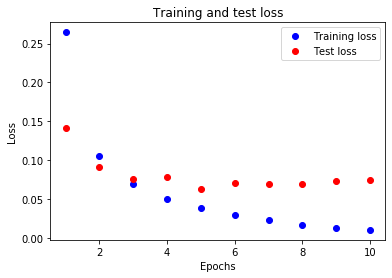

In [33]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

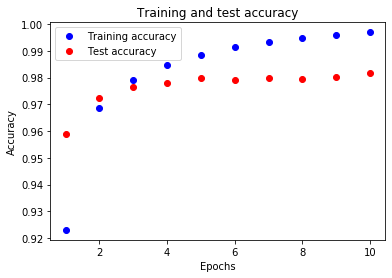

In [35]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()